## Что ж, будем предсказывать, сколько раз посмотрят объявление о собачке

In [15]:
import pandas as pd
pd.set_option('display.expand_frame_repr', True)
import numpy as np
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import array, newaxis

from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

In [130]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [30]:
import matplotlib.pyplot as plt
import seaborn
plt.style.use('ggplot')
%matplotlib inline

In [25]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem.snowball import RussianStemmer

In [179]:
data = pd.read_csv('C:\\Users\\Auditore\\Desktop\\doggy_data.csv', encoding='cp1251', sep=';')

In [180]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [181]:
data.head()

,index,num_views,price,description,title,create_date
0,795324317,329,50,Отдаю прекрасных щенков ответственным людям в...,Отдам 2 месячных щенков в добрые руки в дар,2016-06-13 00:00:00
1,780591203,1833,100,Отдам в хорошие руки двух прекрасных девчёнок...,Метиски швейцарской овчарки,2016-06-13 00:00:00
2,793538864,939,100,"Трепетная и нежная, выжившая вопреки всему и ...",Собака в добрые и ответственные руки,2016-06-13 00:00:00
3,792447832,592,100,4 замечательных щенка были обнаружены на одно...,Кутята в дар,2016-06-13 00:00:00
4,795360111,95,11,"Щенок 2,5 месяца. Крупная и активная девочка,...",Щенок девочка -2.5 месяца,2016-06-13 00:00:00


In [182]:
len(data)-len(data.num_views[data.num_views<10000])

409

In [183]:
data = data[data.num_views<10000]

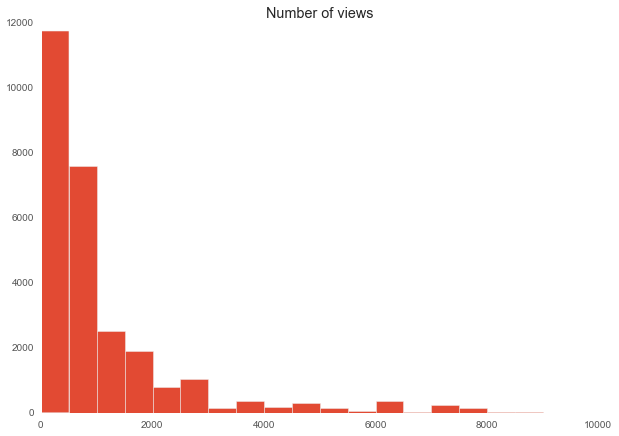

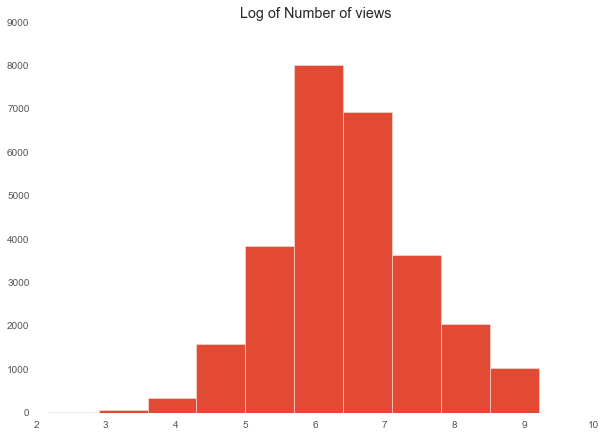

In [184]:
# посещаемость
data.num_views.hist(bins = 20)
plt.title('Number of views')
plt.show()


# логарифм посещаемости
data.num_views.apply(np.log).hist()
plt.title('Log of Number of views')
plt.show()

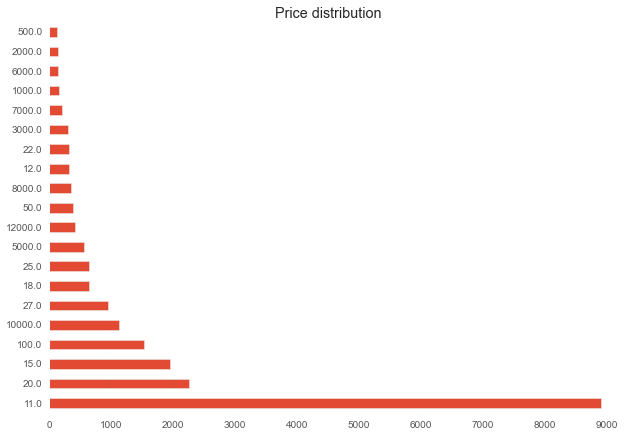

In [185]:
# цена
data.price.value_counts().head(20).plot(kind='barh')
plt.title("Price distribution")
plt.show()

**Число слов в объявлении**

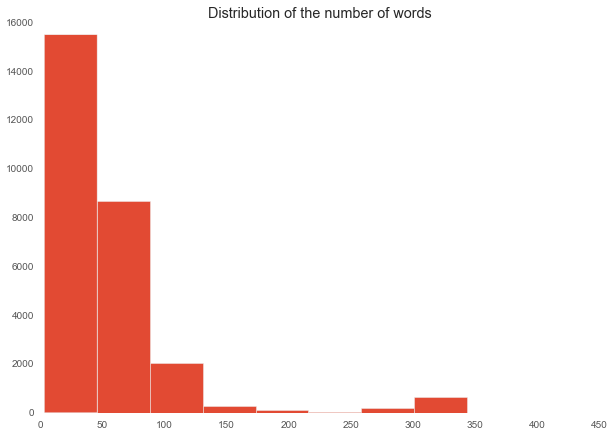

In [186]:
data['num_of_words'] = data.description.apply(lambda x: len(x.split(' ')))
plt.hist(data.num_of_words)
plt.title('Distribution of the number of words')

In [187]:
data.create_date = data.create_date.apply(pd.to_datetime)

In [188]:
data['time_delta'] = datetime(2016, 6, 14) - data.create_date

In [189]:
data.time_delta = data.time_delta.apply(lambda x: x/np.timedelta64(1, 'D'))

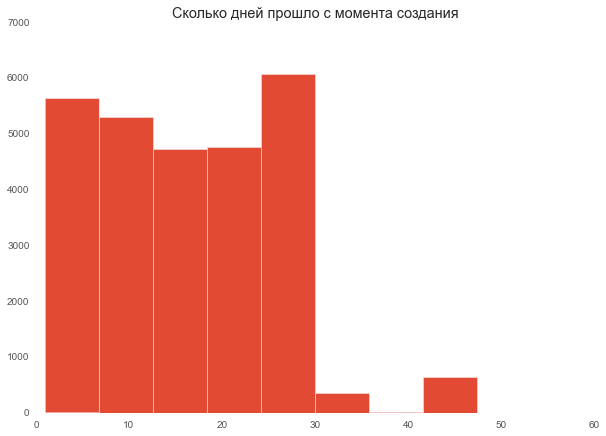

In [190]:
data.time_delta.hist()
plt.title('Сколько дней прошло с момента создания')
plt.show()

**Создаём переменную - среднее число просмотров в день. Для этого делим число просмотров на количество прошедших дней**

In [191]:
data['mean_views'] = data.num_views/data.time_delta

In [192]:
data.mean_views.describe()

count    27516.000000
mean       140.545521
std        331.440983
min          0.333333
25%         22.102586
50%         49.909091
75%        105.000000
max       9075.000000
Name: mean_views, dtype: float64

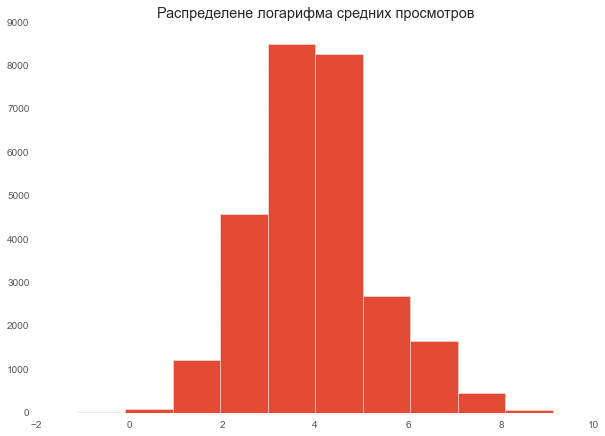

In [193]:
data.mean_views.apply(np.log).hist()
plt.title('Распределене логарифма средних просмотров')
plt.show()

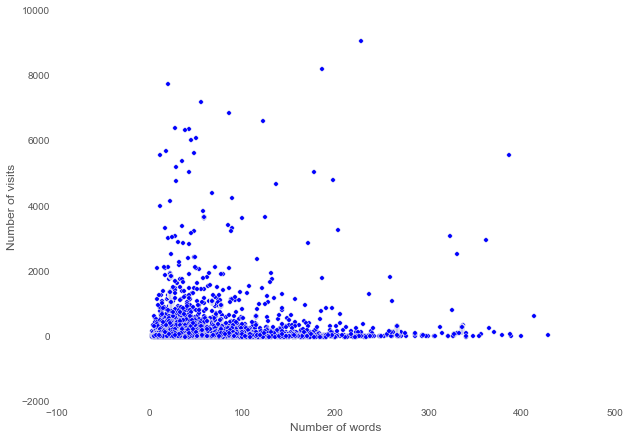

In [194]:
plt.scatter(data.num_of_words,data.mean_views)
plt.xlabel('Number of words')
plt.ylabel('Number of visits')
plt.show()

Наиболее популярные объявления

In [195]:
sorted_df = data.sort(['mean_views'], ascending=False)
for i in (sorted_df.index.tolist()[:10]):
    print('==================')
    print('\nНазвание: ')
    print('----------')
    print(sorted_df.loc[i,'title'])
    
    print('\nОписание: ')
    print('----------')
    print(sorted_df.loc[i,'description'])

    
    print('\nСреднее число просмотров: ',sorted_df.loc[i,'mean_views'])
    print('--------------------------')


Название: 
----------
Малыши крепыши

Описание: 
----------
 3 шикарных кобеля,рождены 01.01.2016На всероссийской выставке кинологического центра "Маджестик Айс" 05 июня 2016 года Москва,эксперт Л.Галиаскароващенком Дорфиф Лорд получена оценка 1 очень перспективный ,CW,лучший бебиНа всероссийской выставке РОО "КЦ"РОМУЛ" 05 июня 2016 года Москва,эксперт И.Соловьеващенком Дорфифан Голд получена оценка 1 очень перспективный,CW,лучший беби.Мы - красавцы,мы - элита,И в паху клеймо набито,Мы ребята ЭКСТРА КЛАСС,Покупай скорее нас!Наша шерстка вся блестит,И отличный аппетит,Мы на улице гуляем,Дом не очень засоряем!А родители у насТакже ЭКСТРА,СУПЕР КЛАСС.В их кровях все чемпионыИ не гадят на газоны.Хоть и стоим мы немало,Вам скупиться не престало.Знает просвещенный мир,Где лежит бесплатный сыр.Долго Вы не размышляйте,Приходите,покупайте!????????????????--Отец - Фанстатик Дог Мон Дориан Пандор,рыже-белого окраса,представитель лучшего питомника Латвии Фанстастик Дог.Юный Чемпион РоссииЮный Чем

Как и ожидалось, максимальное число просмотров имеют породистые собаки

In [196]:
sorted_df = data.sort(['mean_views'], ascending=True)
for i in (sorted_df.index.tolist()[:10]):
    print('==================')
    print('\nНазвание: ')
    print('----------')
    print(sorted_df.loc[i,'title'])
    
    print('\nОписание: ')
    print('----------')
    print(sorted_df.loc[i,'description'])

    
    print('\nСреднее число просмотров: ',sorted_df.loc[i,'mean_views'])
    print('--------------------------')


Название: 
----------
Породистые щенки Джек Рассел

Описание: 
----------
 Для ценителей породы предлагаются щенки с отличной родословной, уравновешенной психикой и заводным характером. Документы РКФ, имеется клеймо в паху, а так же международный ветеринарный паспорт с отметками по возрасту. Все девочки по окрасу бело-рыжие. Ждут своих единственных и неповторимых хозяев. Социализированы к животных и маленьким деткам. Подойдут для выставочной карьеры, разведения и просто для любви. Дополнительную информацию и фото спрашивайте по телефону, к сожалению, нет времени на переписки. 

Среднее число просмотров:  0.333333333333
--------------------------

Название: 
----------
Прекрасные китаечки

Описание: 
----------
 Предлагаются к продаже девочки китайской хохлатой собаки.Голые,окрас бронзово-белый.Красивые очёсы и грива.Дата рождения 31 марта.Очень контактные и ласковые.Для выставок и просто для души.Прекрасно поддаются обучению.Что подтверждается талантами папы,который занимается кинолог

А вот с минимальными просмотрами картина другая - похоже, эти объявления просто слишком новые. Чтобы увидеть, действительно ли объявления о не породистых собаках не пользуются популярностью, имеет смысл убрать из датасета всех собачек, чья цена превышает некоторую символическую сумму, например, 500 рублей

In [197]:
data.price.isnull().sum()

5160

In [199]:
# если цена пропущена, то заменяем на 100р.
data.price[data.price.isnull()] = 100
data_cheap = data[data.price <= 500]
data_cheap.shape

C:\Users\Auditore\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


(23375, 9)